In [1]:
# Importing Libraries

# Data handling and statistical analysis 
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting daily returns for 11 different US stocks in the same time window 
aapl = qs.utils.download_returns('AAPL') 
aapl = aapl.loc['2017-07-01':'2024-08-22']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2017-07-01':'2024-08-22']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2017-07-01':'2024-08-22']

lly = qs.utils.download_returns('LLY')
lly = lly.loc['2017-07-01':'2024-08-22']

nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc['2017-07-01':'2024-08-22']

msft = qs.utils.download_returns('MSFT')
msft = msft.loc['2017-07-01':'2024-08-22']

meta = qs.utils.download_returns('META')
meta = meta.loc['2017-07-01':'2024-08-22']

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2017-07-01':'2024-08-22']

googl = qs.utils.download_returns('GOOGL')
googl = googl.loc['2017-07-01':'2024-08-22']

jpm = qs.utils.download_returns('JPM')
jpm = jpm.loc['2017-07-01':'2024-08-22']

costco = qs.utils.download_returns('COST')
costco = costco.loc['2017-07-01':'2024-08-22']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Plotting Daily Returns for each stock
subtracting the difference between the stock's closing price on one day and its closing price the day before, dividing the result by the closing of the day before, and multiplying it by 100.




Apple Daily Returns Plot:



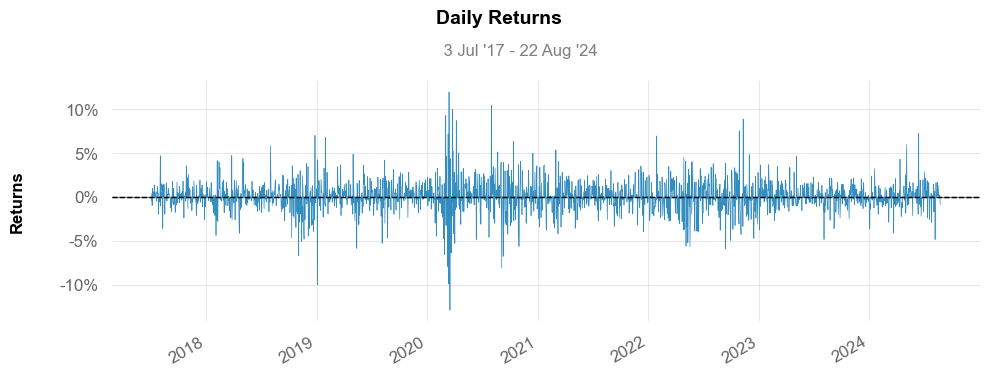






Tesla Inc. Daily Returns Plot:



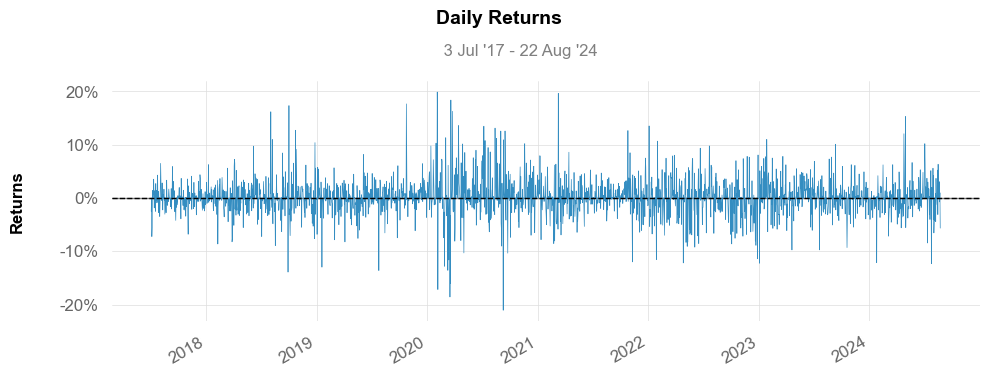






The Walt Disney Company Daily Returns Plot:



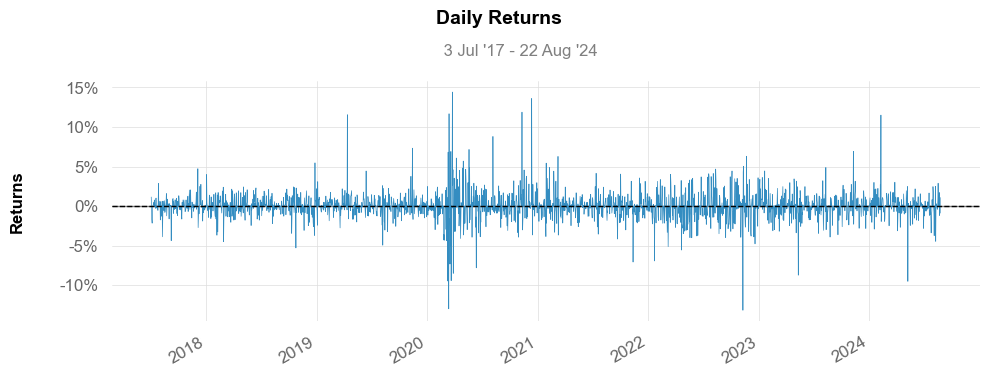






Eli Lily and company Daily Returns Plot:



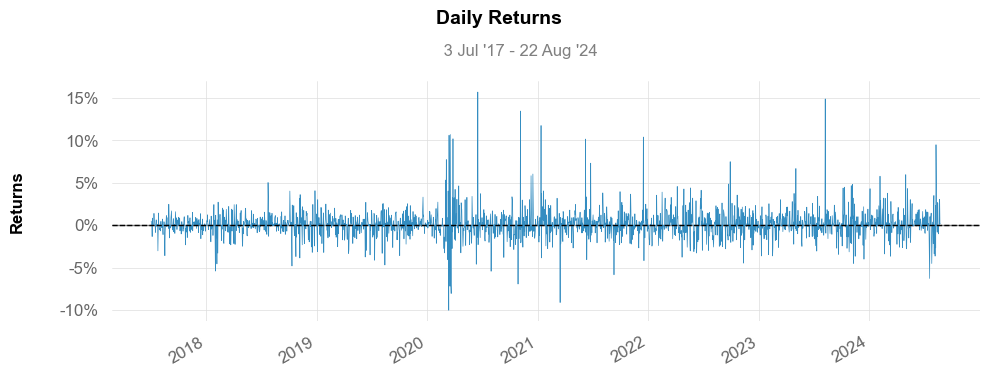






NVIDIA Corporation Daily Returns Plot:



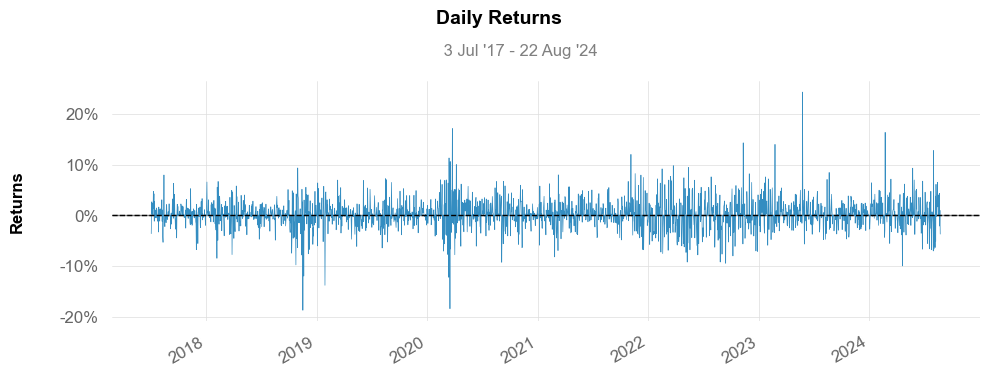






Microsoft Corporation Daily Returns Plot:



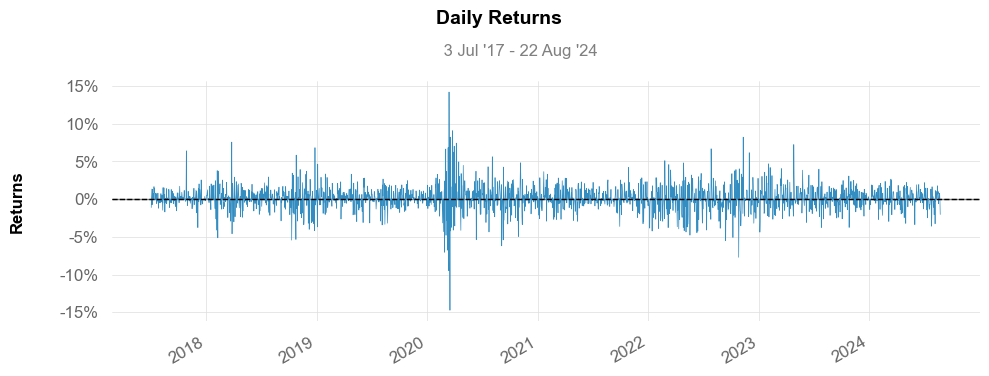






Meta Platforms Inc. Daily Returns Plot:



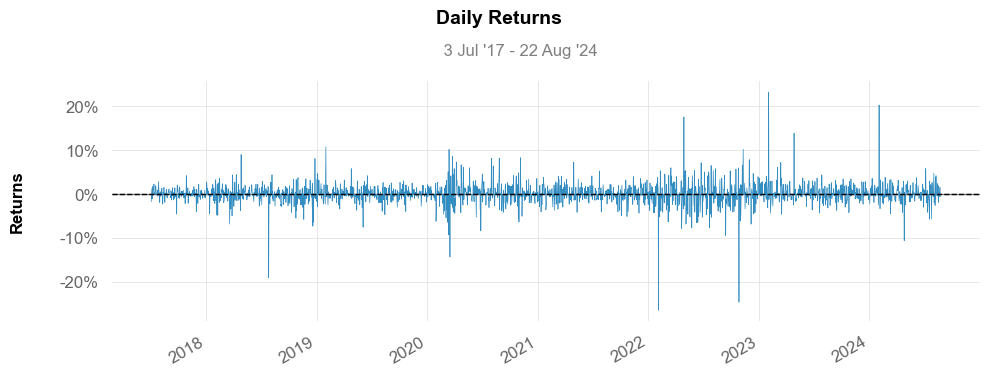






Amazon.com, Inc. Daily Returns Plot:



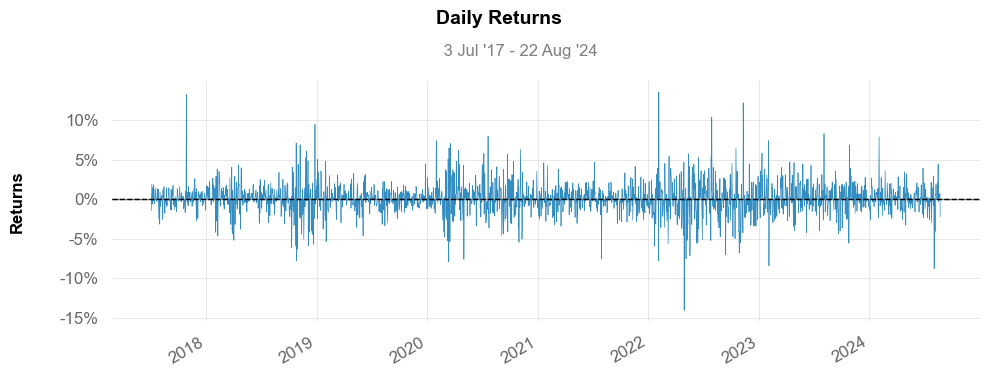






Alphabet Inc. Daily Returns Plot:



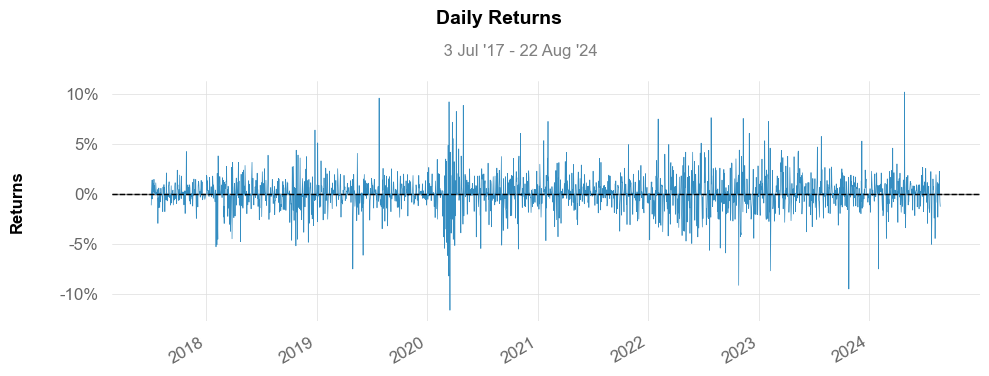






JP Morgan Chase & Co. Daily Returns Plot:



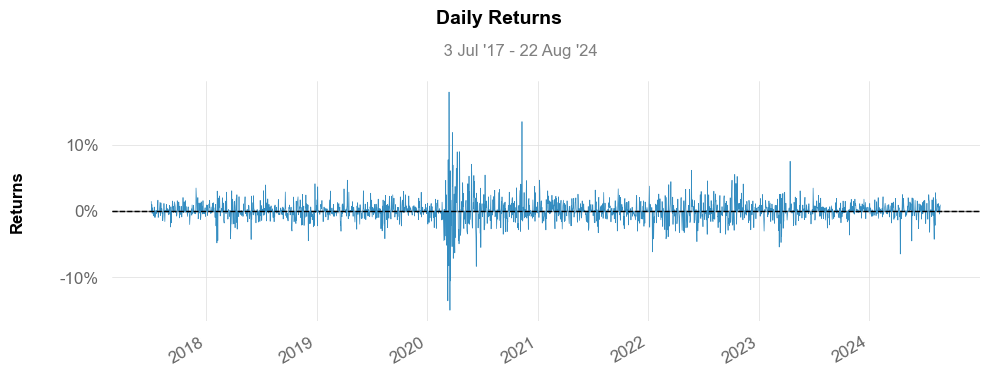






Costco Wholesale Corporation Daily Returns Plot:



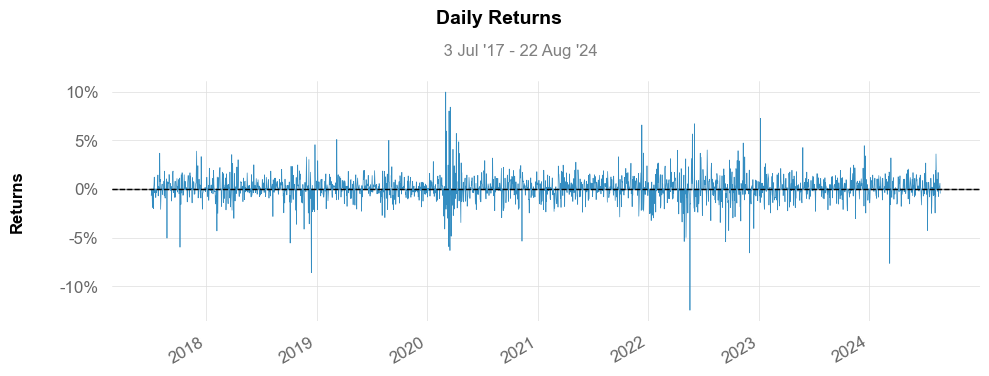

In [3]:
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, benchmark=None)
print('\n')
print('\n')
print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla, benchmark=None)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis, benchmark=None)
print('\n')
print('\n')
print('\nEli Lily and company Daily Returns Plot:\n')
qs.plots.daily_returns(lly, benchmark=None)
print('\n')
print('\n')
print('\nNVIDIA Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(nvda, benchmark=None)
print('\n')
print('\n')
print('\nMicrosoft Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(msft, benchmark=None)
print('\n')
print('\n')
print('\nMeta Platforms Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(meta, benchmark=None)
print('\n')
print('\n')
print('\nAmazon.com, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amzn, benchmark=None)
print('\n')
print('\n')
print('\nAlphabet Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(googl, benchmark=None)
print('\n')
print('\n')
print('\nJP Morgan Chase & Co. Daily Returns Plot:\n')
qs.plots.daily_returns(jpm, benchmark=None)
print('\n')
print('\n')
print('\nCostco Wholesale Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(costco, benchmark=None)

# Calculating Standard Deviations
$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$
Where <b><i>x</i></b> represents the set of returns data, $\bar{x}$ is the mean of the returns data, and <b><i>N</i></b> is the number of observations. Standard deviation enables investors to assess the risk level and to compare the volatility of different stocks.

In [4]:
print('\n')
print("Apple's Standard Deviation from 2017 to 2024: ", aapl.std().round(3))
print('\n')
print("\nTesla's Standard Deviation from 2017 to 2024: ", tsla.std().round(3))
print('\n')
print("\nDisney's Standard Deviation from 2017 to 2024: ", dis.std().round(3))
print('\n')
print("\nEli Lily's Standard Deviation from 2017 to 2024: ", lly.std().round(3))
print('\n')
print("NVIDIA's Standard Deviation from 2017 to 2024: ", nvda.std().round(3))
print('\n')
print("\nMicrosoft's Standard Deviation from 2017 to 2024: ", msft.std().round(3))
print('\n')
print("\nMeta's Standard Deviation from 2017 to 2024: ", meta.std().round(3))
print('\n')
print("\nAmazon's Standard Deviation from 2017 to 2024: ", amzn.std().round(3))
print('\n')
print("\nGoogle's Standard Deviation from 2017 to 2024: ", googl.std().round(3))
print('\n')
print("\nJPMorgon's Standard Deviation from 2017 to 2024: ", jpm.std().round(3))
print('\n')
print("\nCostco's Standard Deviation from 2017 to 2024: ", costco.std().round(3))



Apple's Standard Deviation from 2017 to 2024:  0.019



Tesla's Standard Deviation from 2017 to 2024:  0.039



Disney's Standard Deviation from 2017 to 2024:  0.019



Eli Lily's Standard Deviation from 2017 to 2024:  0.018


NVIDIA's Standard Deviation from 2017 to 2024:  0.032



Microsoft's Standard Deviation from 2017 to 2024:  0.018



Meta's Standard Deviation from 2017 to 2024:  0.026



Amazon's Standard Deviation from 2017 to 2024:  0.021



Google's Standard Deviation from 2017 to 2024:  0.019



JPMorgon's Standard Deviation from 2017 to 2024:  0.018



Costco's Standard Deviation from 2017 to 2024:  0.014


In [5]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, lly, nvda, msft, meta, amzn, googl, jpm, costco], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'lly', 'nvda', 'msft', 'meta', 'amzn', 'googl', 'jpm', 'costco']
merged_df # Displaying dataframe

aapl      tsla       dis       lly      nvda      msft  \
Date                                                                     
2017-07-03 -0.003611 -0.024861  0.011388  0.004860 -0.036179 -0.011026   
2017-07-05  0.004111 -0.072401 -0.017030  0.000000  0.026699  0.013349   
2017-07-06 -0.009439 -0.055826 -0.021585 -0.013301  0.003006 -0.007383   
2017-07-07  0.010159  0.014215 -0.000290  0.008456  0.022860  0.012979   
2017-07-10  0.006104  0.009035  0.002613 -0.000122  0.047288  0.007486   
...              ...       ...       ...       ...       ...       ...   
2024-08-16  0.005918  0.009246  0.005744 -0.010155  0.014000 -0.006080   
2024-08-19 -0.000708  0.030539  0.017021 -0.000336  0.043506  0.007312   
2024-08-20  0.002745 -0.007274 -0.011892  0.030549 -0.021154  0.007757   
2024-08-21 -0.000486  0.009815  0.010920  0.002105  0.009823 -0.001554   
2024-08-22 -0.008260 -0.056479 -0.008818  0.002311 -0.037043 -0.020253   

                meta      amzn     googl       jpm    costco  
Date                                                          
2017-07-03 -0.016890 -0.014814 -0.010993  0.014770 -0.006940  
2017-07-05  0.012868  0.018602  0.013921  0.010027 -0.005037  
2017-07-06 -0.010110 -0.006444 -0.004902 -0.003202 -0.005885  
2017-07-07  0.017605  0.014112  0.014143  0.005033 -0.018970  
2017-07-10  0.013603  0.018094  0.010831 -0.007032 -0.020180  
...              ...       ...       ...       ...       ...  
2024-08-16 -0.018443 -0.002984  0.010291  0.011439 -0.007705  
2024-08-19  0.003527  0.006551  0.022766  0.006917  0.002022  
2024-08-20 -0.004818  0.003703  0.003060 -0.004317  0.004413  
2024-08-21  0.016004  0.006876 -0.007955  0.000373  0.005958  
2024-08-22 -0.006036 -0.022098 -0.012361  0.009459 -0.004379  

[1797 rows x 11 columns]

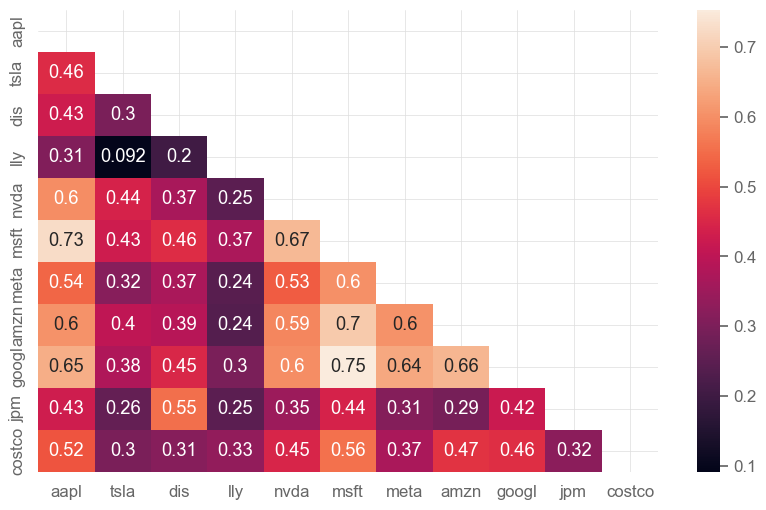

In [6]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

 Beta is a measure of a stock's volatility compared to the market. A Beta of 1 means that the stock is as volatile as the market, a Beta greater than 1 indicates higher volatility than the market, and a Beta less than 1 suggests lower volatility.

 Alpha, on the other hand, is a measurement of a stock's excess return relative to its expected performance based on its Beta. A positive Alpha indicates that a stock has outperformed its expected performance based on its Beta, while a negative Alpha suggests underperformance.

 To determine Beta and Alpha, we require data from the SP500, which acts as the benchmark, to fit a linear regression model between the stocks and the index. This will enable us to extract the Beta and Alpha values of the stocks.

 Formula?

In [8]:
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2017-07-01':'2024-08-22']
# Fitting linear relation among Apple's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = aapl.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))

# Fitting linear relation among Tasla's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = tsla.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Tsla beta: ', beta.round(3))
print('\nTsla alpha: ', alpha.round(3))

# Fitting linear relation among Disney's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = dis.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Disney beta: ', beta.round(3))
print('\nDisney alpha: ', alpha.round(3))

# Fitting linear relation among LLY's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = lly.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('lly beta: ', beta.round(3))
print('\nlly alpha: ', alpha.round(3))

# Fitting linear relation among Microsoft's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = msft.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Microsoft beta: ', beta.round(3))
print('\nMicrosoft alpha: ', alpha.round(3))

# Fitting linear relation among Meta's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = meta.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Meta beta: ', beta.round(3))
print('\Meta alpha: ', alpha.round(3))

# Fitting linear relation among Amazon's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = amzn.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Amazon beta: ', beta.round(3))
print('\nAmazon alpha: ', alpha.round(3))

# Fitting linear relation among Google's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = googl.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Google beta: ', beta.round(3))
print('\nGoogle alpha: ', alpha.round(3))

# Fitting linear relation among JPMorgon's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = jpm.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('JPMorgon beta: ', beta.round(3))
print('\nJPMorgon alpha: ', alpha.round(3))

# Fitting linear relation among Costco's returns and Benchmark
X = sp500.values.reshape(-1,1)
y = costco.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Costco beta: ', beta.round(3))
print('\nCostco alpha: ', alpha.round(3))

[*********************100%%**********************]  1 of 1 completed



AAPL beta:  [1.216]

AAPL alpha:  [0.001]


Tsla beta:  [1.514]

Tsla alpha:  [0.001]


Disney beta:  [1.011]

Disney alpha:  [-0.]


lly beta:  [0.665]

lly alpha:  [0.001]


Microsoft beta:  [1.214]

Microsoft alpha:  [0.001]


Meta beta:  [1.307]
\Meta alpha:  [0.]


Amazon beta:  [1.148]

Amazon alpha:  [0.]


Google beta:  [1.165]

Google alpha:  [0.]


JPMorgon beta:  [1.07]

JPMorgon alpha:  [0.]


Costco beta:  [0.738]

Costco alpha:  [0.001]


# Sharpe ratio 
The Sharpe ratio is a measure of the risk-adjusted return of an investment. It is calculated by dividing the average excess return of the investment over the standard deviation of the returns, as shown by the following equation:
$\text{Sharpe ratio} = \frac{R_p - R_f}{\sigma_p}$

A higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio. In general, a Sharpe ratio greater than 1 is considered good, while a Sharpe ratio less than 1 is considered poor. A Sharpe ratio of 1 means that the investment's average return is equal to the risk-free rate of return.

In [9]:
print('\n')
print("Apple's Sharpe Ratio", qs.stats.sharpe(aapl).round(2))
print('\n')
print("\nTesla's Sharpe Ratio", qs.stats.sharpe(tsla).round(2))
print('\n')
print("\nDisney's Sharpe Ratio", qs.stats.sharpe(dis).round(2))
print('\n')
print("\nEli Lily's Sharpe Ratio", qs.stats.sharpe(lly).round(2))
print('\n')
print("NVIDIA's Sharpe Ratio", qs.stats.sharpe(nvda).round(2))
print('\n')
print("\nMicrosoft's Sharpe Ratio", qs.stats.sharpe(msft).round(2))
print('\n')
print("\nMeta's Sharpe Ratio", qs.stats.sharpe(meta).round(2))
print('\n')
print("\nAmazon's Sharpe Ratio", qs.stats.sharpe(amzn).round(2))
print('\n')
print("\nGoogle's Sharpe Ratio ", qs.stats.sharpe(googl).round(2))
print('\n')
print("\nJPMorgon's Sharpe Ratio", qs.stats.sharpe(jpm).round(2))
print('\n')
print("\nCostco's Sharpe Ratio", qs.stats.sharpe(costco).round(2))



Apple's Sharpe Ratio 1.0



Tesla's Sharpe Ratio 0.8



Disney's Sharpe Ratio 0.08



Eli Lily's Sharpe Ratio 1.33


NVIDIA's Sharpe Ratio 1.23



Microsoft's Sharpe Ratio 1.02



Meta's Sharpe Ratio 0.64



Amazon's Sharpe Ratio 0.7



Google's Sharpe Ratio  0.74



JPMorgon's Sharpe Ratio 0.56



Costco's Sharpe Ratio 1.16


In [10]:
SharpRatio = {'aapl': qs.stats.sharpe(aapl).round(2), 
              'tsla': qs.stats.sharpe(tsla).round(2),
                'dis': qs.stats.sharpe(dis).round(2),
                'lly': qs.stats.sharpe(lly).round(2), 
                'nvda': qs.stats.sharpe(nvda).round(2),
                'msft': qs.stats.sharpe(msft).round(2), 
                'meta': qs.stats.sharpe(meta).round(2), 
                'amzn': qs.stats.sharpe(amzn).round(2), 
                'googl': qs.stats.sharpe(googl).round(2),
                'jpm': qs.stats.sharpe(jpm).round(2),
                'costco': qs.stats.sharpe(costco).round(2)}

In [11]:
sorted_ShapeRation = sorted(SharpRatio.items(), key=lambda x:x[1],  reverse=True)
print(sorted_ShapeRation)

[('lly', 1.33), ('nvda', 1.23), ('costco', 1.16), ('msft', 1.02), ('aapl', 1.0), ('tsla', 0.8), ('googl', 0.74), ('amzn', 0.7), ('meta', 0.64), ('jpm', 0.56), ('dis', 0.08)]


# Optimizaing Portfolios

In [12]:
w = 1/11
weights = [w, w, w, w, w, w, w, w, w, w, w] # Defining weights for each stock
portfolio = aapl*weights[0] + tsla*weights[1] + dis*weights[2] + lly*weights[3] + nvda*weights[4] + msft*weights[5] + meta*weights[6] + amzn*weights[7] + googl*weights[8] + jpm*weights[9] + costco*weights[10]# Creating portfolio multiplying each stock for its respective weight 
portfolio # Displaying portfolio's daily returns

Date
2017-07-03   -0.008572
2017-07-05    0.000465
2017-07-06   -0.012279
2017-07-07    0.009118
2017-07-10    0.007975
                ...   
2024-08-16    0.001025
2024-08-19    0.012647
2024-08-20    0.000252
2024-08-21    0.004716
2024-08-22   -0.014905
Name: Close, Length: 1797, dtype: float64

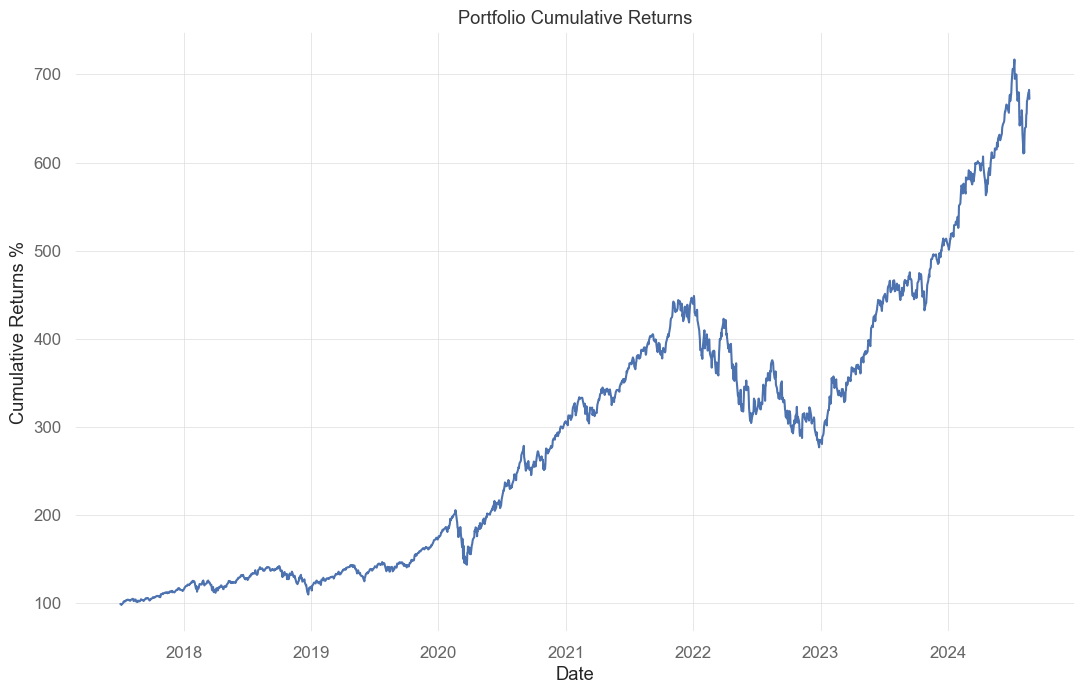

In [13]:
cumulative_ret = (portfolio+1).cumprod()
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(cumulative_ret*100)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns %")
ax1.set_title("Portfolio Cumulative Returns")
plt.show()

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-07-03   2017-07-03
End Period                 2024-08-22   2024-08-22
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          129.87%      572.26%
CAGR﹪                     8.38%        20.22%

Sharpe                     0.7          1.21
Prob. Sharpe Ratio         96.71%       99.92%
Smart Sharpe               0.62         1.07
Sortino                    0.97         1.73
Smart Sortino              0.86         1.53
Sortino/√2                 0.69         1.22
Smart Sortino/√2           0.61         1.08
Omega                      1.24         1.24

Max Drawdown               -33.92%      -38.28%
Longest DD Days            745          543
Volatility (ann.)          19.39%       24.67%
R^2                        0.84         0.84
Information Ratio          0.1          0.1
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2022-12-28  2023-06-30   543    -38.283061        -36.439164
2  2020-02-20  2020-03-23  2020-06-02   104    -30.116771        -29.635044
3  2018-10-02  2018-12-24  2019-04-22   203    -22.717684        -19.459600
4  2024-07-11  2024-08-05  2024-08-22    43    -14.862715        -14.766062
5  2019-04-30  2019-06-03  2019-07-10    72    -12.867423        -10.854850

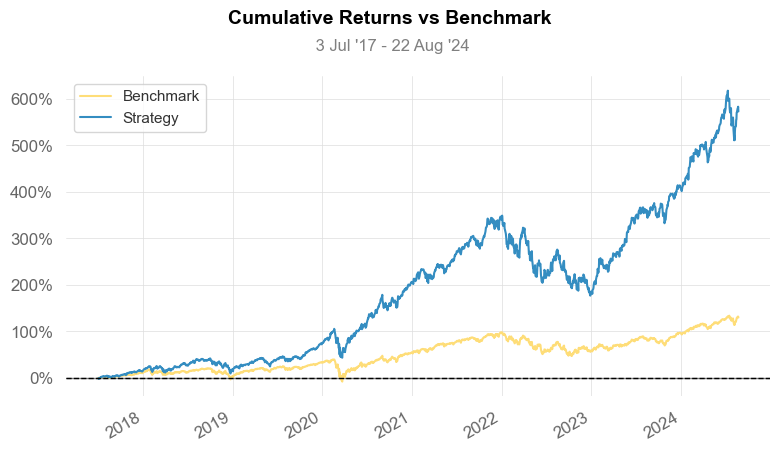

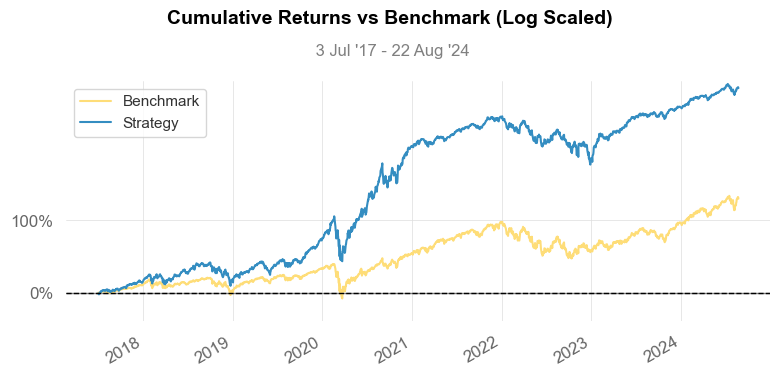

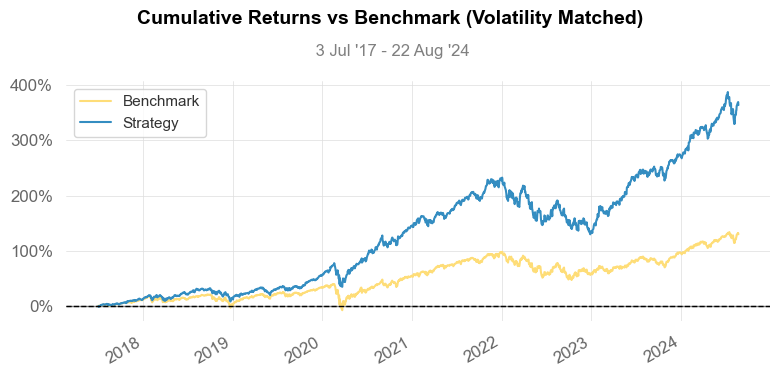

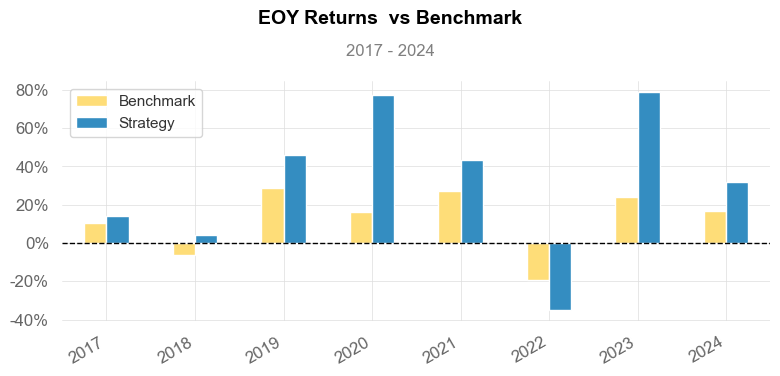

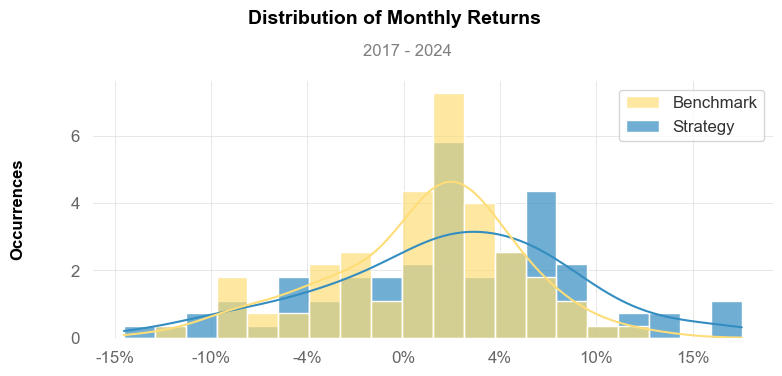

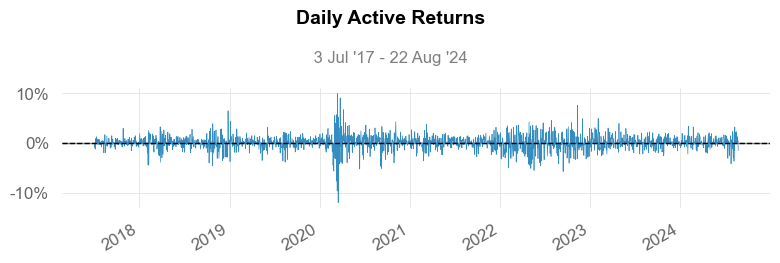

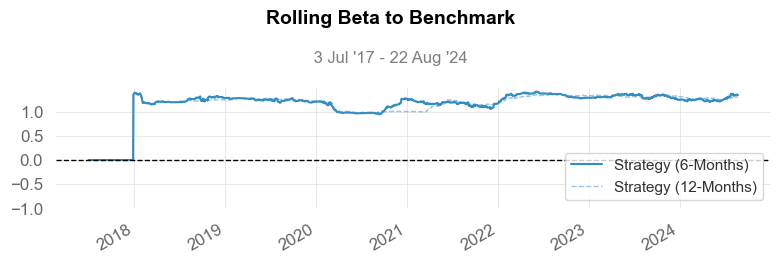

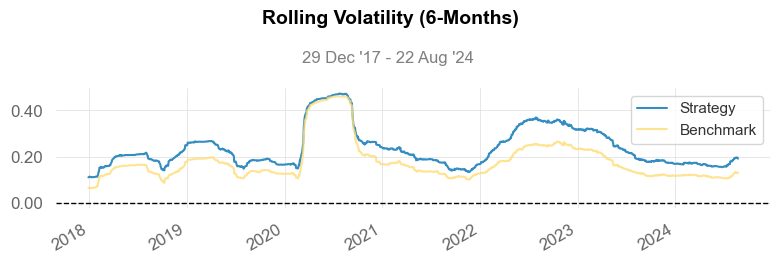

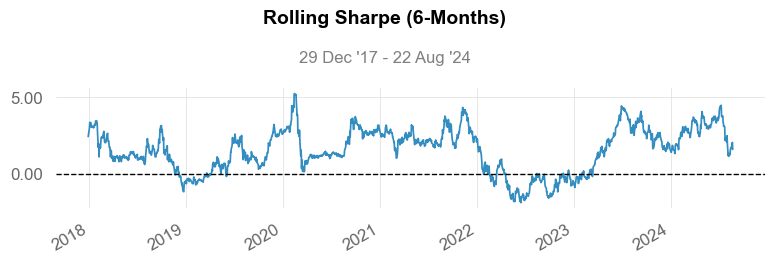

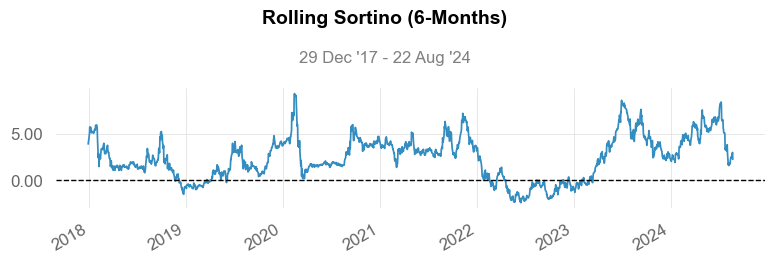

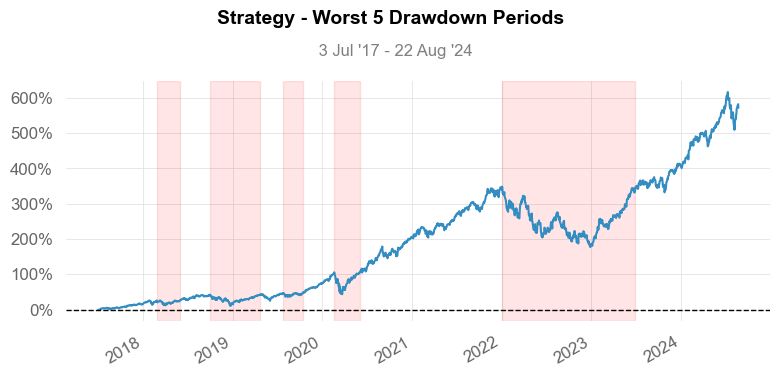

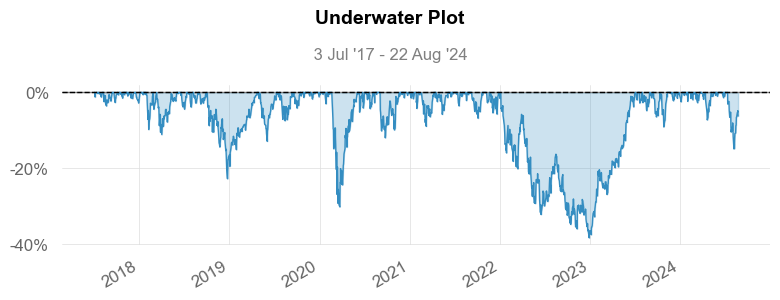

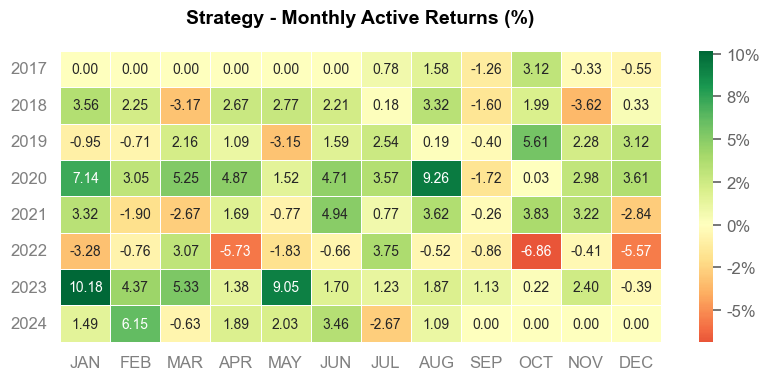

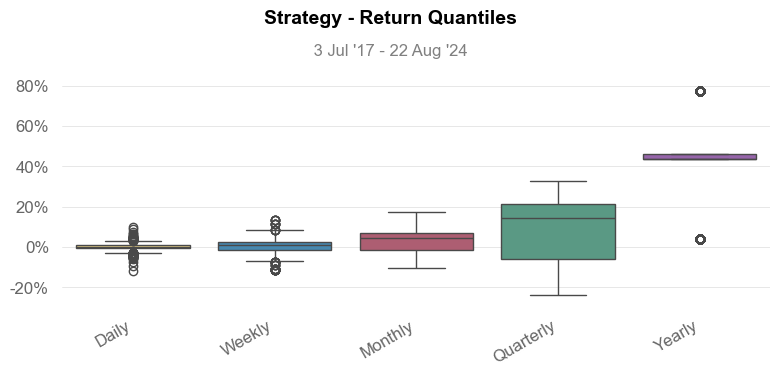

In [14]:
qs.reports.full(portfolio, benchmark = sp500)

Generate a pandas dataframe containing the adjusted closing prices of the stocks, with dates as index, and each columns representing each stock.

In [15]:
# Getting daily returns for 11 different US stocks in the same time window 
aapl_df = yf.download('AAPL', start = '2017-07-01', end = '2024-08-22')
tsla_df = yf.download('TSLA', start = '2017-07-01', end = '2024-08-22')
dis_df = yf.download('DIS', start = '2017-07-01', end = '2024-08-22')
lly_df = yf.download('LLY', start = '2017-07-01', end = '2024-08-22')
nvda_df = yf.download('NVDA', start = '2017-07-01', end = '2024-08-22')
msft_df = yf.download('MSFT', start = '2017-07-01', end = '2024-08-22')
meta_df = yf.download('META', start = '2017-07-01', end = '2024-08-22')
amzn_df = yf.download('AMZN', start = '2017-07-01', end = '2024-08-22')
googl_df = yf.download('GOOGL', start = '2017-07-01', end = '2024-08-22')
jpm_df = yf.download('JPM', start = '2017-07-01', end = '2024-08-22')
costco_df = yf.download('COST', start = '2017-07-01', end = '2024-08-22')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
aapl_df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-07-03  36.220001  36.325001  35.775002  35.875000  33.542889  57111200
2017-07-05  35.922501  36.197498  35.680000  36.022499  33.680798  86278400
2017-07-06  35.755001  35.875000  35.602501  35.682499  33.362896  96515200
2017-07-07  35.724998  36.187500  35.724998  36.044998  33.701832  76806800
2017-07-10  36.027500  36.487499  35.842499  36.264999  33.907536  84362400

In [17]:
# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
lly_df = lly_df['Adj Close']
nvda_df = nvda_df['Adj Close']
msft_df = msft_df['Adj Close']
meta_df = meta_df['Adj Close']
amzn_df = amzn_df['Adj Close']
googl_df = googl_df['Adj Close']
jpm_df = jpm_df['Adj Close']
costco_df = costco_df['Adj Close']

# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, dis_df, lly_df, nvda_df, msft_df, meta_df, amzn_df, googl_df, jpm_df, costco_df], join = 'outer', axis = 1)
df.columns = ['aapl_df', 'tsla_df', 'dis_df', 'lly_df', 'nvda_df', 'msft_df', 'meta_df', 'amzn_df', 'googl_df', 'jpm_df', 'costco_df']
df # Visualizing dataframe for input

aapl_df     tsla_df      dis_df      lly_df     nvda_df  \
Date                                                                     
2017-07-03   33.542889   23.507999  102.100540   73.133369    3.440710   
2017-07-05   33.680798   21.806000  100.361809   73.133369    3.532574   
2017-07-06   33.362896   20.588667   98.926018   72.160614    3.543193   
2017-07-07   33.701832   20.881332   98.897301   72.770790    3.624191   
2017-07-10   33.907536   21.070000   99.155731   72.761955    3.795573   
...                ...         ...         ...         ...         ...   
2024-08-15  224.720001  214.139999   88.790001  931.580017  122.860001   
2024-08-16  226.050003  216.119995   89.300003  922.119995  124.580002   
2024-08-19  225.889999  222.720001   90.820000  921.809998  130.000000   
2024-08-20  226.509995  221.100006   89.739998  949.969971  127.250000   
2024-08-21  226.399994  223.270004   90.720001  951.969971  128.500000   

               msft_df     meta_df     amzn_df    googl_df      jpm_df  \
Date                                                                     
2017-07-03   62.636646  148.125595   47.682999   45.920296   76.117043   
2017-07-05   63.472775  150.031693   48.570000   46.559563   76.880280   
2017-07-06   63.004166  148.514816   48.257000   46.331326   76.634079   
2017-07-07   63.821918  151.129440   48.938000   46.986576   77.019798   
2017-07-10   64.299713  153.185211   49.823502   47.495487   76.478142   
...                ...         ...         ...         ...         ...   
2024-08-15  421.029999  537.330017  177.589996  161.300003  211.550003   
2024-08-16  418.470001  527.419983  177.059998  162.960007  213.970001   
2024-08-19  421.529999  529.280029  178.220001  166.669998  215.449997   
2024-08-20  424.799988  526.729980  178.880005  167.179993  214.520004   
2024-08-21  424.140015  535.159973  180.110001  165.850006  214.600006   

             costco_df  
Date                    
2017-07-03  142.351074  
2017-07-05  141.634018  
2017-07-06  140.800430  
2017-07-07  138.129440  
2017-07-10  135.342010  
...                ...  
2024-08-15  877.349976  
2024-08-16  870.590027  
2024-08-19  872.349976  
2024-08-20  876.200012  
2024-08-21  881.419983  

[1796 rows x 11 columns]

In [18]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Markowitz Mean-Variance Optimization Model
aka Modern Port. Theory, invented by Harry Markowitz.
* https://medium.com/latinxinai/portfolio-optimization-the-markowitz-mean-variance-model-c07a80056b8a
* https://mishraayush447.medium.com/portfolio-optimization-using-python-b8d2b64e520e
* https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html

##  maximization of the Sharpe ratio

In [19]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix

# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization 

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('aapl_df', 0.0),
             ('tsla_df', 0.0),
             ('dis_df', 0.0),
             ('lly_df', 0.50307),
             ('nvda_df', 0.21147),
             ('msft_df', 0.0),
             ('meta_df', 0.0),
             ('amzn_df', 0.0),
             ('googl_df', 0.0),
             ('jpm_df', 0.0),
             ('costco_df', 0.28546)])

In [20]:
# Creating new portfolio with optimized weights
new_weights = [0.50307, 0.21147, 0.28546]
optimized_portfolio_maxShape = lly*new_weights[0] + nvda*new_weights[1] + costco*new_weights[2]
optimized_portfolio_maxShape # Visualizing daily returns

Date
2017-07-03   -0.007187
2017-07-05    0.004208
2017-07-06   -0.007736
2017-07-07    0.003673
2017-07-10    0.004178
                ...   
2024-08-16   -0.004348
2024-08-19    0.009608
2024-08-20    0.012155
2024-08-21    0.004837
2024-08-22   -0.007921
Name: Close, Length: 1797, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-07-03   2017-07-03
End Period                 2024-08-22   2024-08-22
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          572.26%      1,327.74%
CAGR﹪                     20.22%       29.3%

Sharpe                     1.21         1.67
Prob. Sharpe Ratio         99.92%       100.0%
Smart Sharpe               1.08         1.5
Sortino                    1.73         2.62
Smart Sortino              1.55         2.35
Sortino/√2                 1.22         1.85
Smart Sortino/√2           1.1          1.66
Omega                      1.36         1.36

Max Drawdown               -38.28%      -21.15%
Longest DD Days            543          236
Volatility (ann.)          24.67%       24.02%
R^2                        0.61         0.61
Information Ratio          0.04         0.04
Calmar            

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-10-05  2018-12-24  2019-03-20   167    -21.154905        -18.333123
2  2022-04-08  2022-05-19  2022-11-29   236    -18.772445        -17.844167
3  2020-02-21  2020-03-23  2020-04-13    53    -17.898165        -16.947863
4  2021-12-28  2022-01-27  2022-03-23    86    -17.859682        -17.351447
5  2024-07-11  2024-08-07  2024-08-20    41    -16.900354        -16.721192

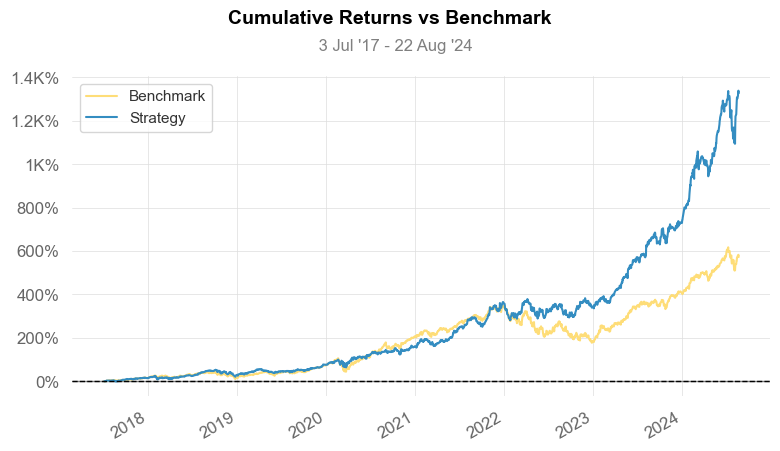

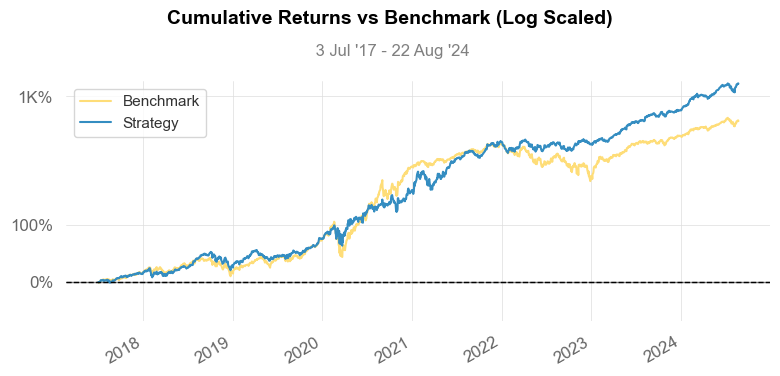

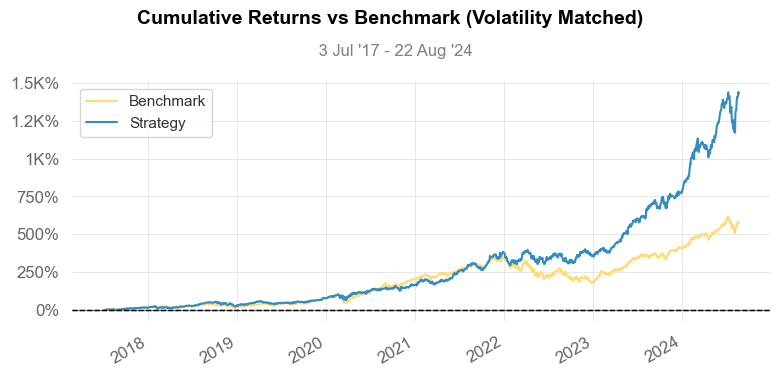

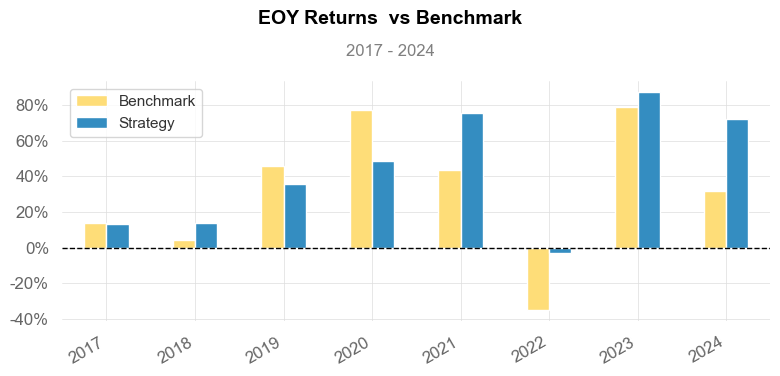

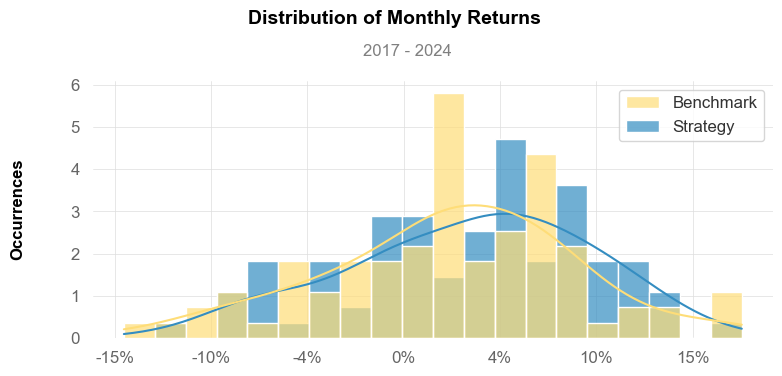

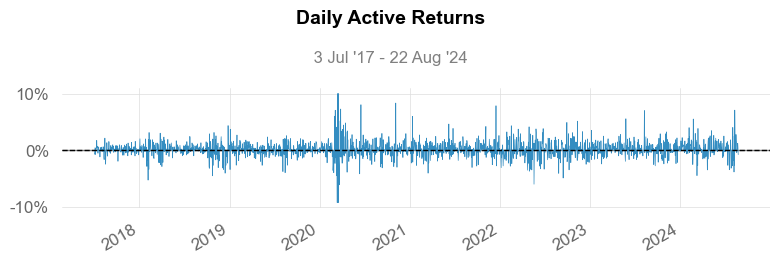

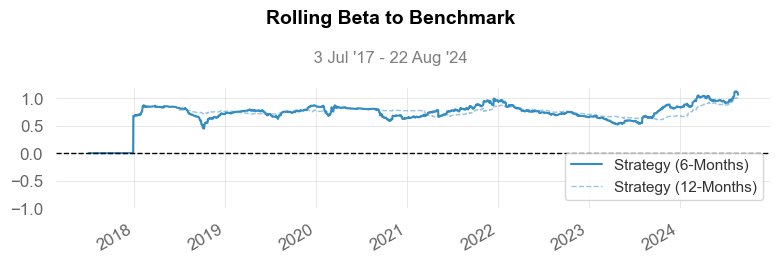

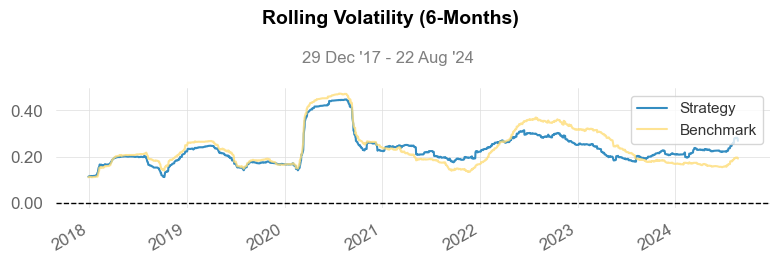

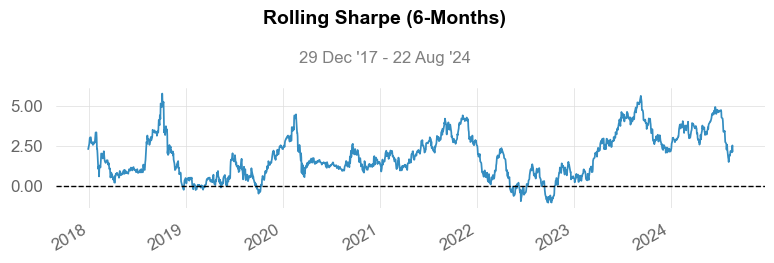

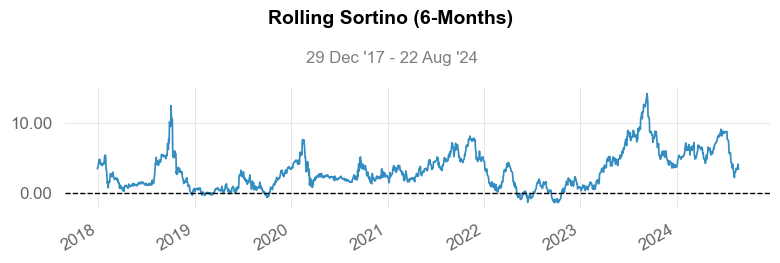

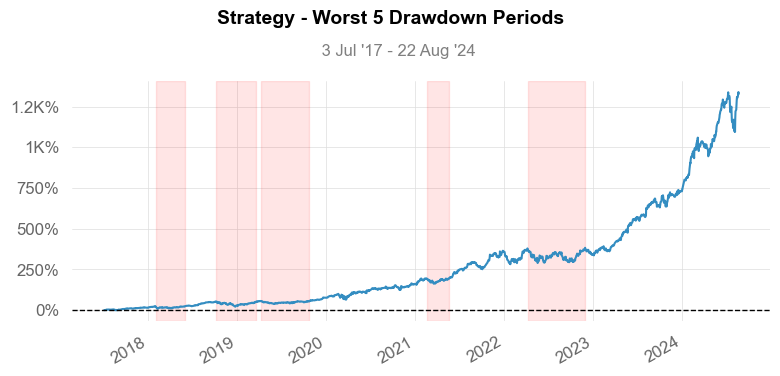

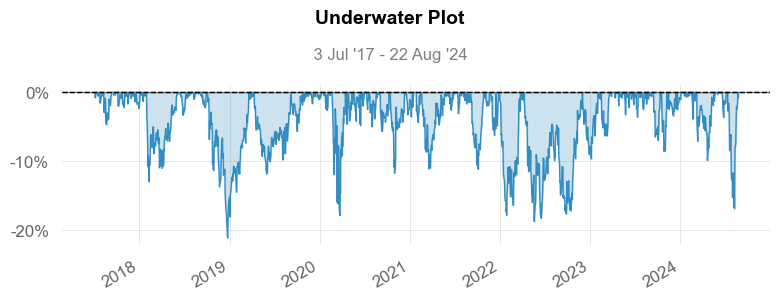

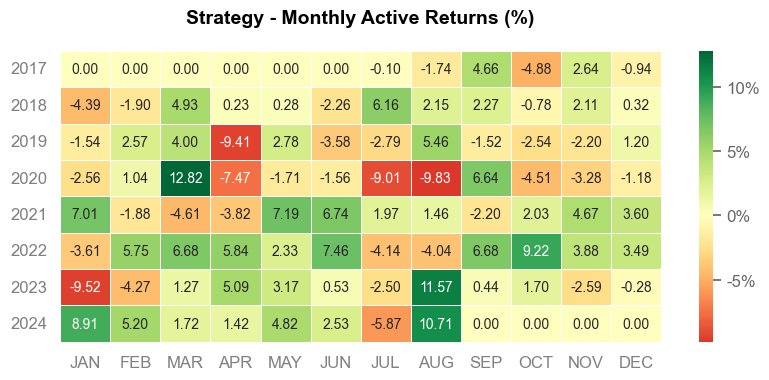

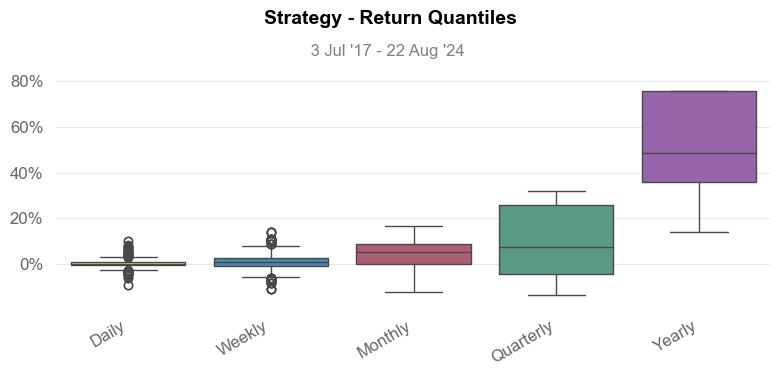

In [21]:
qs.reports.full(optimized_portfolio_maxShape, benchmark = portfolio)

## Minimization of the volatility 

In [22]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix

# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.min_volatility() # Optimizing weights for volatility minimization 

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('aapl_df', 0.0),
             ('tsla_df', 0.0),
             ('dis_df', 0.123),
             ('lly_df', 0.22448),
             ('nvda_df', 0.0),
             ('msft_df', 0.0),
             ('meta_df', 0.0),
             ('amzn_df', 0.01779),
             ('googl_df', 0.04115),
             ('jpm_df', 0.16654),
             ('costco_df', 0.42704)])

In [23]:
# Creating new portfolio with optimized weights
new_weights2 = [0.123, 0.22448, 0.01779, 0.04115, 0.16654, 0.42704 ]
optimized_portfolio_minVo = dis*new_weights2[0] + lly*new_weights2[1] + amzn*new_weights2[2] + googl*new_weights2[3] + jpm*new_weights2[4] + costco*new_weights2[5]
# optimized_portfolio # Visualizing daily returns

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-07-03   2017-07-03
End Period                 2024-08-22   2024-08-22
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          572.26%      398.32%
CAGR﹪                     20.22%       16.79%

Sharpe                     1.21         1.29
Prob. Sharpe Ratio         99.92%       99.97%
Smart Sharpe               1.05         1.12
Sortino                    1.73         1.87
Smart Sortino              1.51         1.64
Sortino/√2                 1.22         1.32
Smart Sortino/√2           1.07         1.16
Omega                      1.27         1.27

Max Drawdown               -38.28%      -22.65%
Longest DD Days            543          426
Volatility (ann.)          24.67%       18.89%
R^2                        0.67         0.67
Information Ratio          -0.02        -0.02
Calmar           

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-21  2020-03-23  2020-08-05   167    -22.646060        -20.564773
2  2022-04-08  2022-05-19  2023-06-07   426    -20.603221        -19.687720
3  2018-12-04  2018-12-24  2019-03-11    98    -15.470843        -13.366900
4  2021-12-30  2022-01-25  2022-04-06    98    -13.446377        -13.411778
5  2024-07-11  2024-08-05  2024-08-22    43    -11.078982        -10.553837

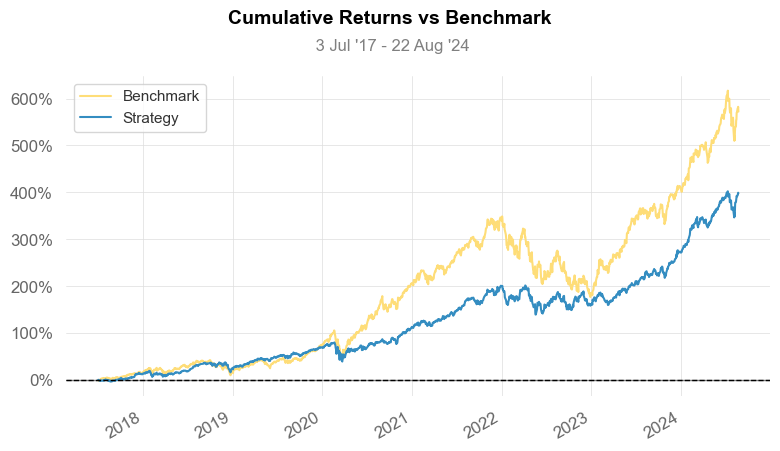

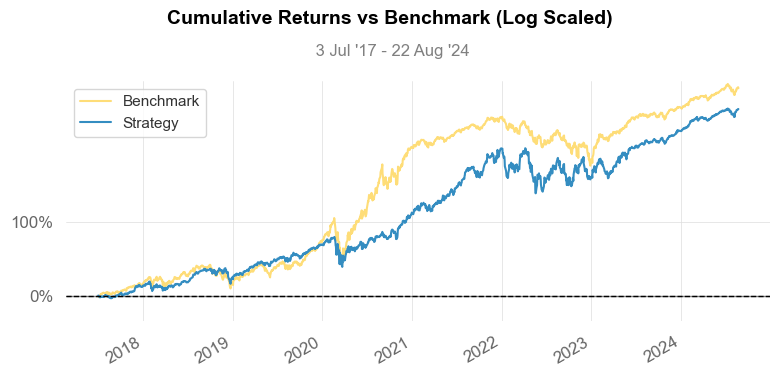

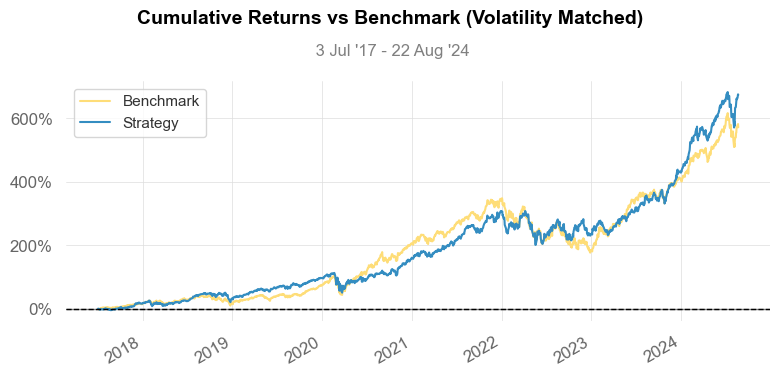

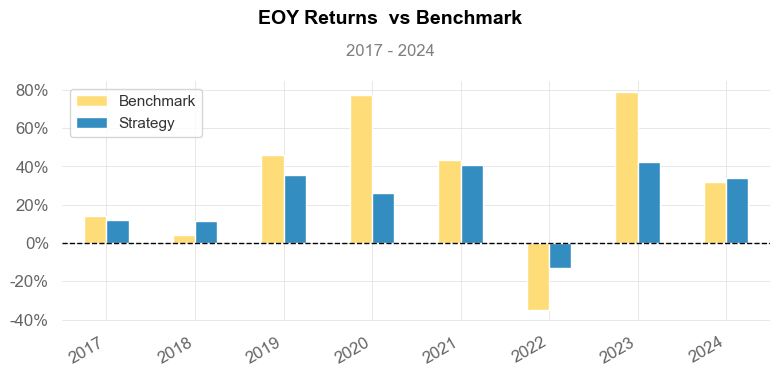

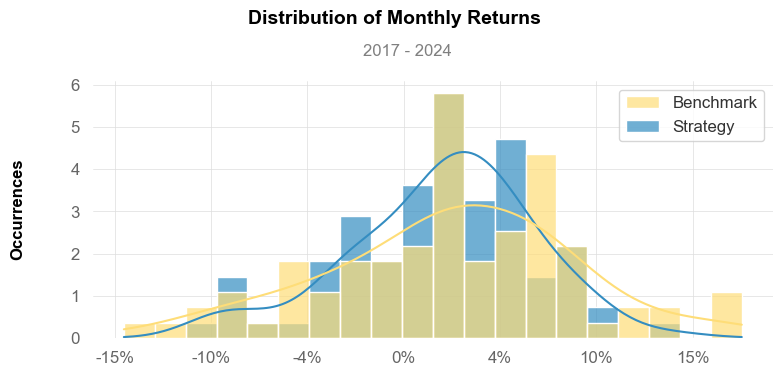

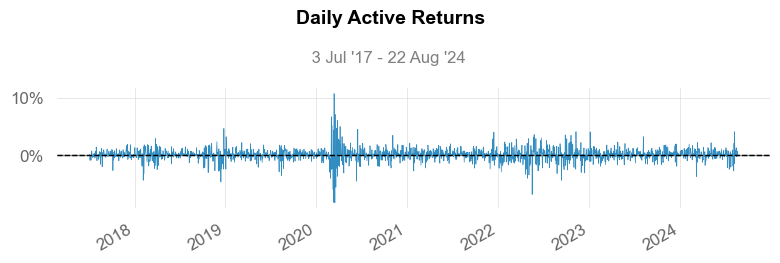

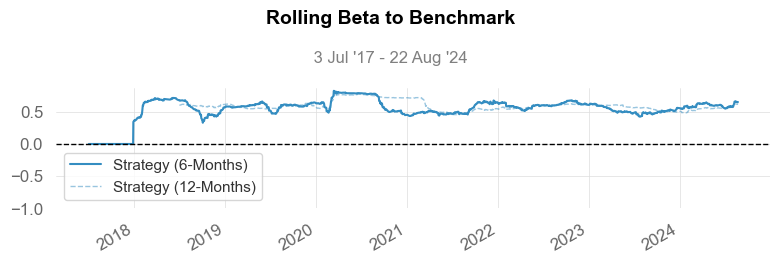

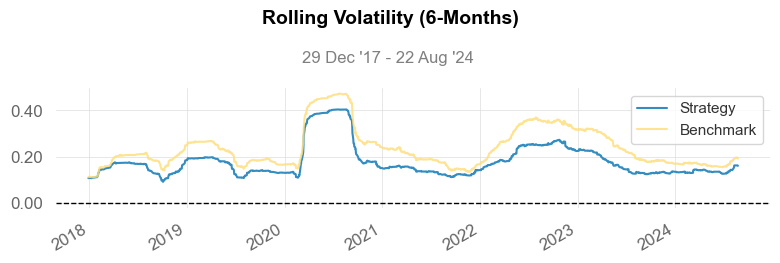

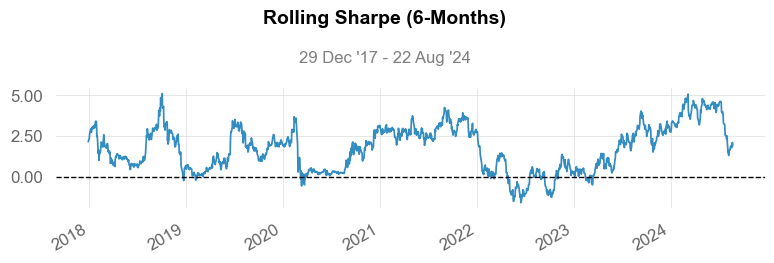

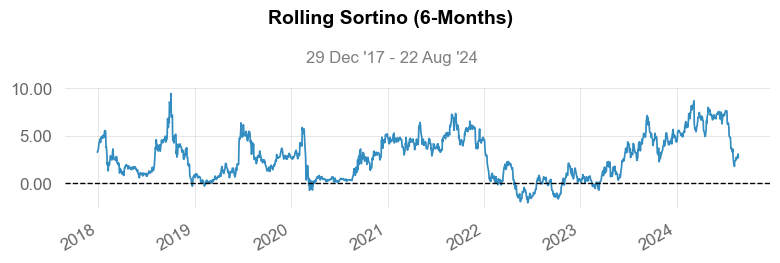

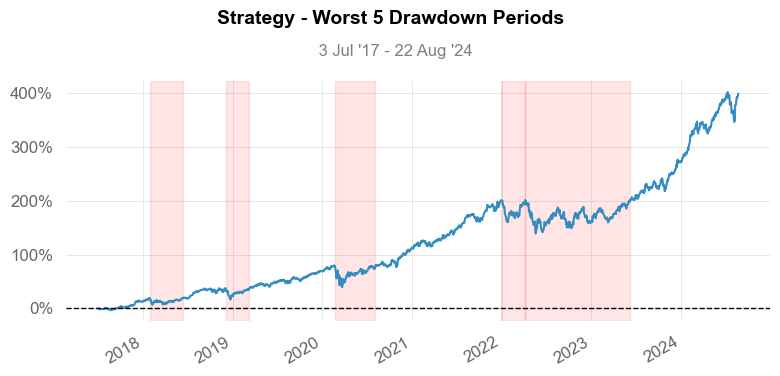

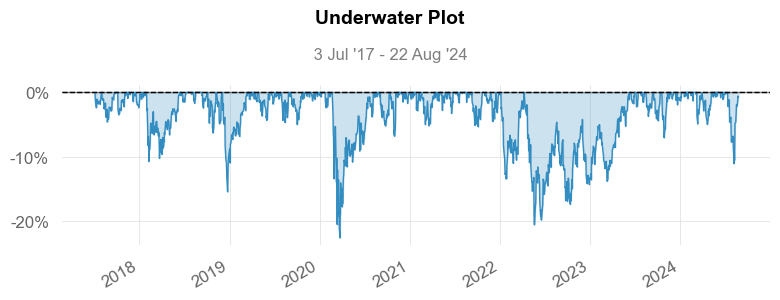

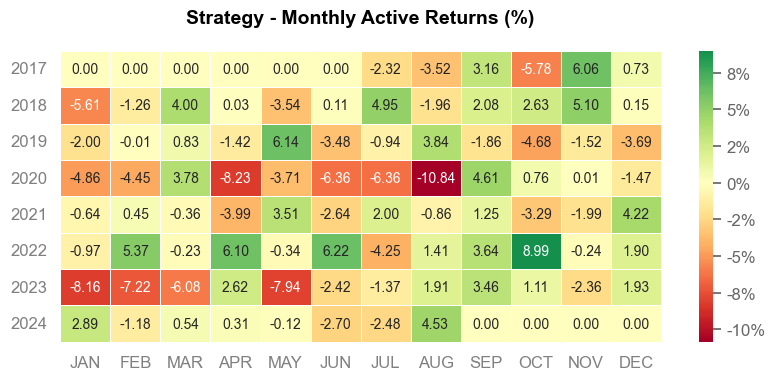

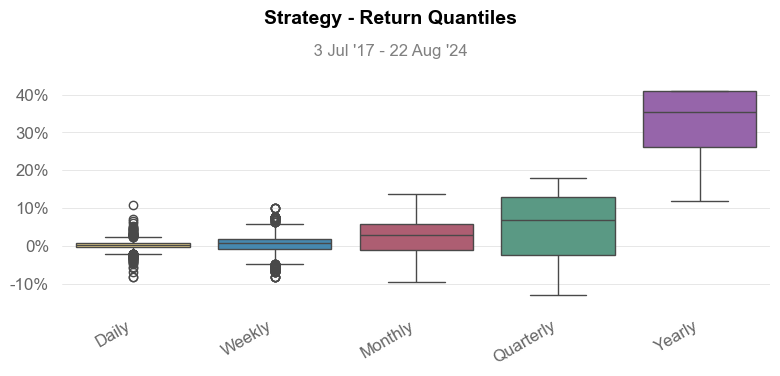

In [24]:
qs.reports.full(optimized_portfolio_minVo, benchmark = portfolio)

# weights from GA

In [25]:
GA_portfolios_weights = [0.042625, 0.346680, 0.010477, 0.117757, 0.001297, 0.272472,0.065091, 0.011854, 0.017012, 0.030110, 0.084625]  

In [26]:
GA_portfolio_maxShape = aapl*GA_portfolios_weights[0] \
           +tsla*GA_portfolios_weights[1] + dis*GA_portfolios_weights[2] \
           +lly*GA_portfolios_weights[3] + nvda*GA_portfolios_weights[4] \
           +msft*GA_portfolios_weights[5] + meta*GA_portfolios_weights[6] \
           +amzn*GA_portfolios_weights[7] + googl*GA_portfolios_weights[8] \
           +jpm*GA_portfolios_weights[9] + costco*GA_portfolios_weights[10] \
           
GA_portfolio_maxShape # Visualizing daily returns

Date
2017-07-03   -0.012737
2017-07-05   -0.020261
2017-07-06   -0.024968
2017-07-07    0.010020
2017-07-10    0.004871
                ...   
2024-08-16   -0.000685
2024-08-19    0.013818
2024-08-20    0.003180
2024-08-21    0.004837
2024-08-22   -0.026270
Name: Close, Length: 1797, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-07-03   2017-07-03
End Period                 2024-08-22   2024-08-22
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          572.26%      836.52%
CAGR﹪                     20.22%       24.14%

Sharpe                     1.21         1.17
Prob. Sharpe Ratio         99.92%       99.9%
Smart Sharpe               1.12         1.09
Sortino                    1.73         1.72
Smart Sortino              1.6          1.59
Sortino/√2                 1.22         1.22
Smart Sortino/√2           1.13         1.13
Omega                      1.23         1.23

Max Drawdown               -38.28%      -45.02%
Longest DD Days            543          556
Volatility (ann.)          24.67%       30.84%
R^2                        0.8          0.8
Information Ratio          0.03         0.03
Calmar              

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2023-01-05  2023-07-13   556    -45.023328        -43.770997
2  2020-02-20  2020-03-18  2020-05-29   100    -36.694799        -35.043945
3  2018-12-04  2019-06-03  2019-07-22   231    -18.002667        -15.863215
4  2024-07-11  2024-08-07  2024-08-22    43    -17.863578        -17.275461
5  2021-01-27  2021-03-08  2021-06-23   148    -16.721199        -13.999085

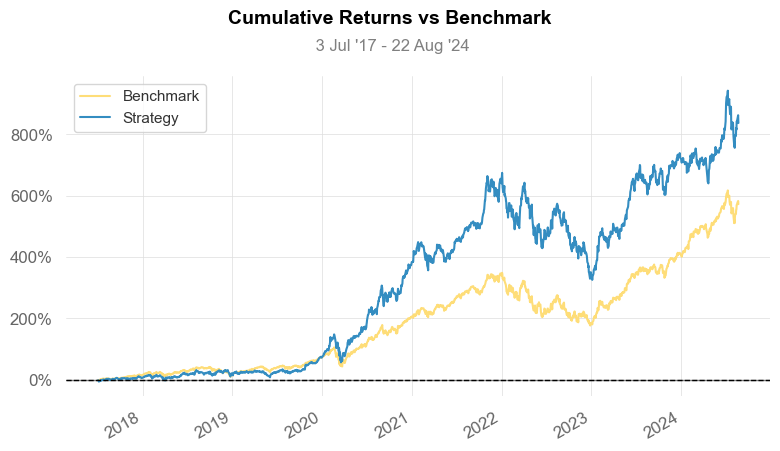

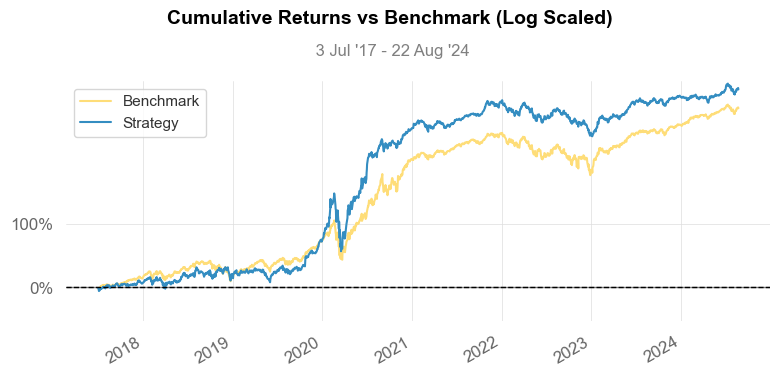

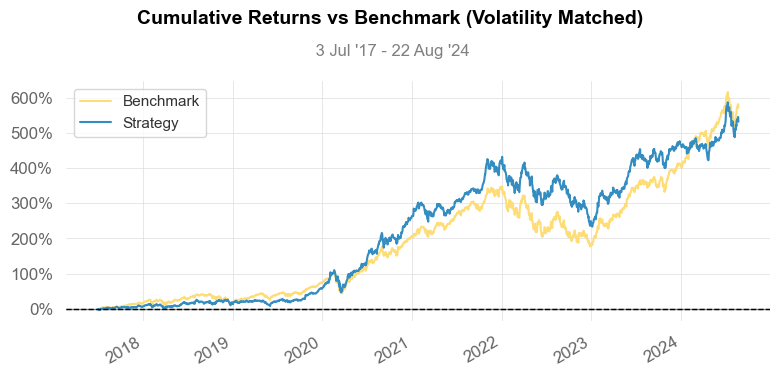

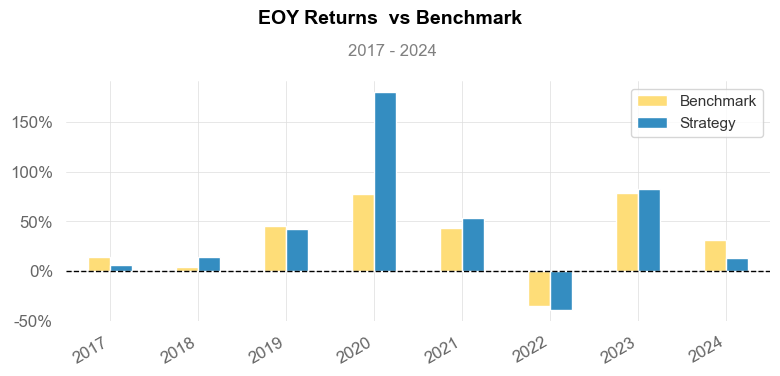

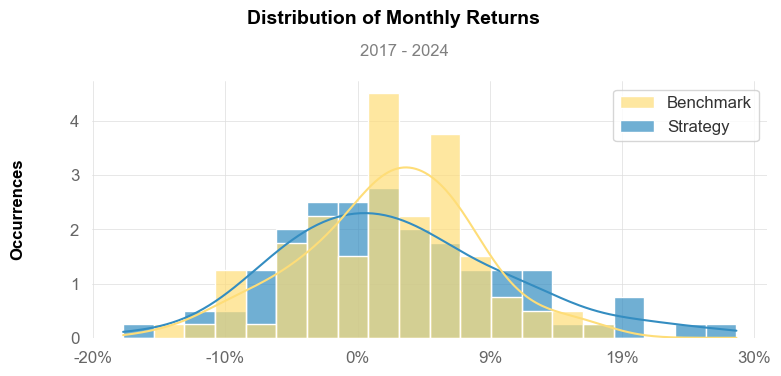

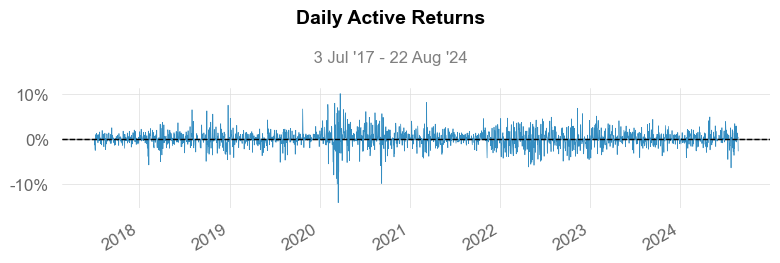

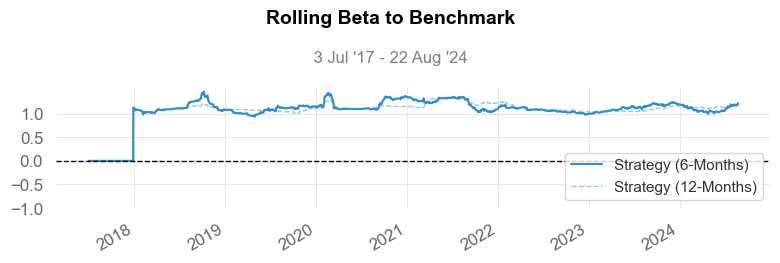

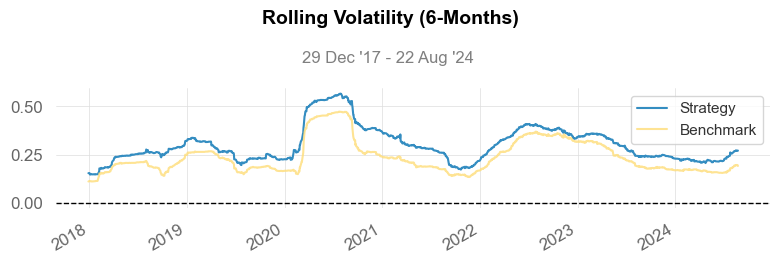

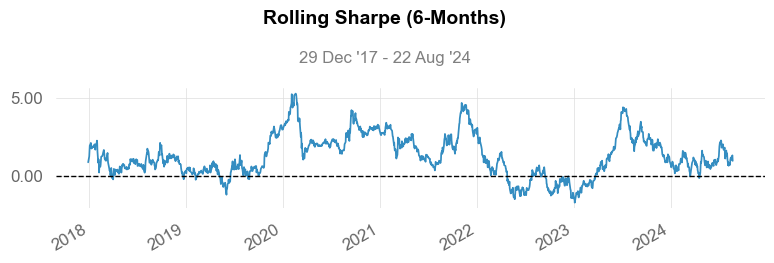

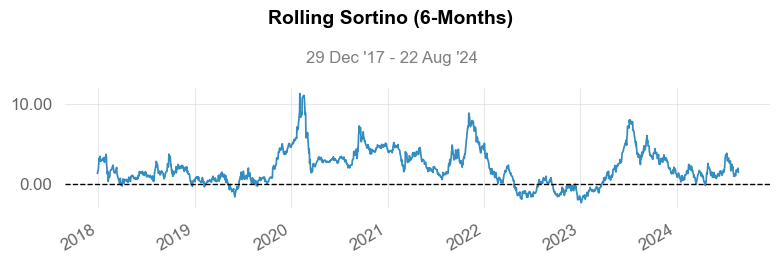

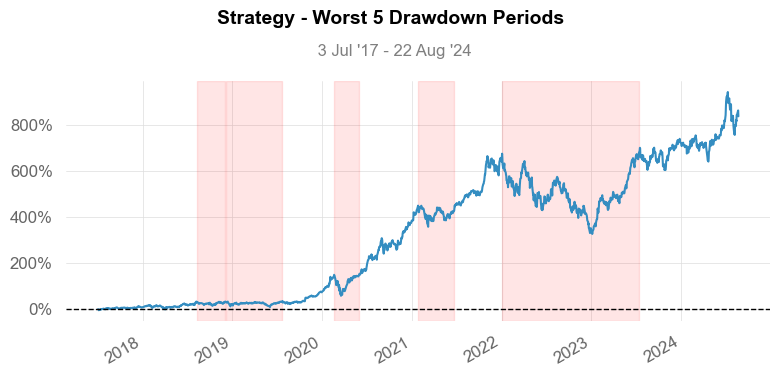

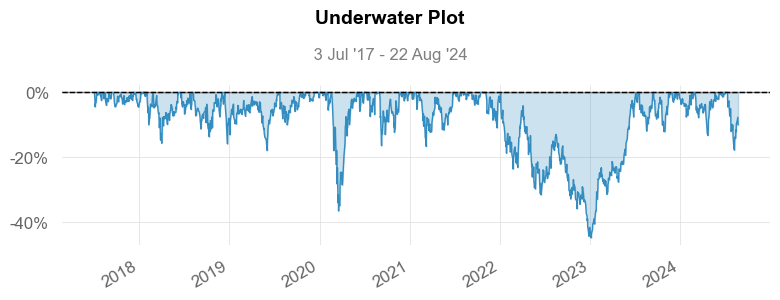

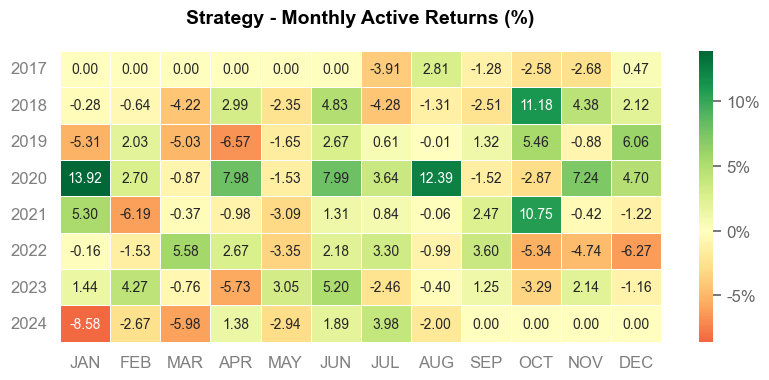

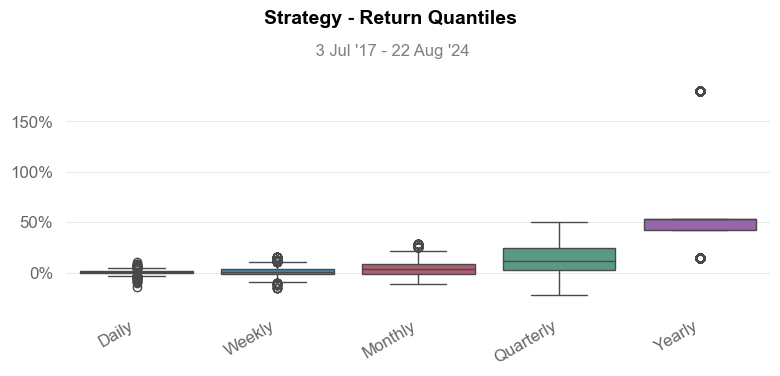

In [27]:
qs.reports.full(GA_portfolio_maxShape, benchmark = portfolio)

In [ ]:
# Weights from LSTM

In [28]:
LSTM_portfolios_weights = [5.9343956e-04, 5.9599802e-04, 3.8894298e-04, 2.8665244e-04,
       3.3292241e-04, 2.5857016e-04, 3.2369513e-04, 3.6137525e-04,
       5.0364097e-04, 6.5535301e-04, 9.9569899e-01]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-07-03   2017-07-03
End Period                 2024-08-22   2024-08-22
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          572.26%      449.54%
CAGR﹪                     20.22%       17.9%

Sharpe                     1.21         1.16
Prob. Sharpe Ratio         99.92%       99.88%
Smart Sharpe               1.14         1.09
Sortino                    1.73         1.68
Smart Sortino              1.63         1.58
Sortino/√2                 1.22         1.19
Smart Sortino/√2           1.15         1.12
Omega                      1.24         1.24

Max Drawdown               -38.28%      -31.47%
Longest DD Days            543          608
Volatility (ann.)          24.67%       22.88%
R^2                        0.39         0.39
Information Ratio          -0.01        -0.01
Calmar            

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-04-08  2022-05-20  2023-12-06   608    -31.470265        -27.586065
2  2018-09-12  2018-12-24  2019-04-03   204    -22.188128        -19.256504
3  2020-12-01  2021-03-08  2021-06-21   203    -20.396190        -18.507833
4  2021-12-30  2022-01-25  2022-03-28    89    -15.919704        -15.161328
5  2020-02-21  2020-03-12  2020-07-08   139    -13.716670        -13.388056

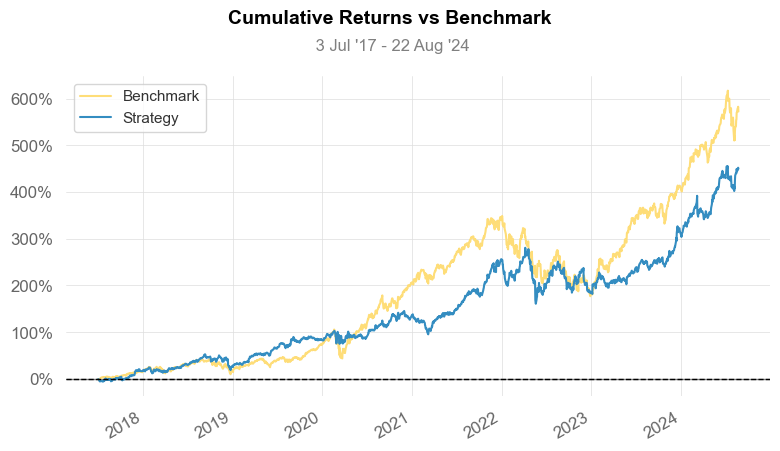

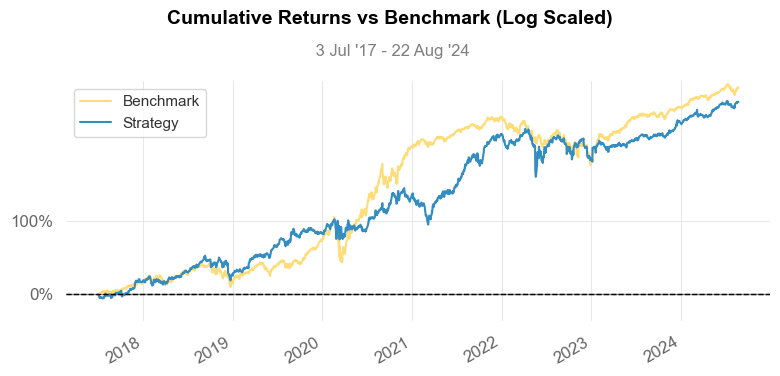

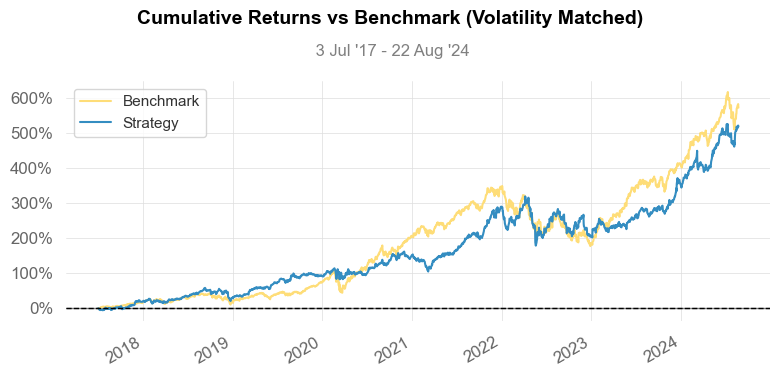

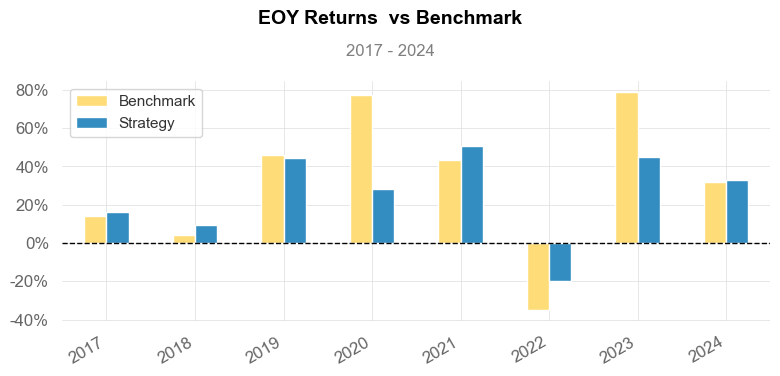

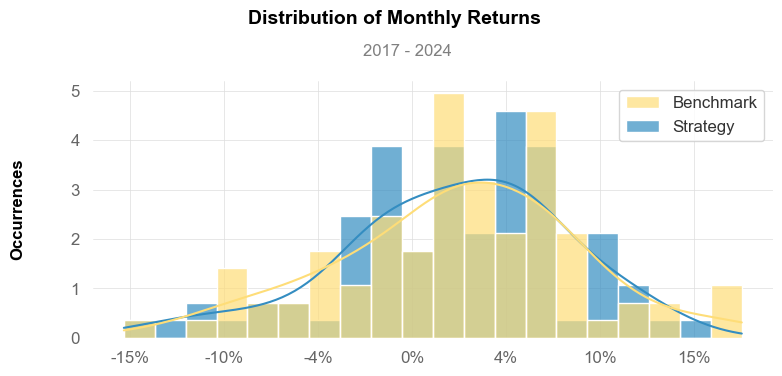

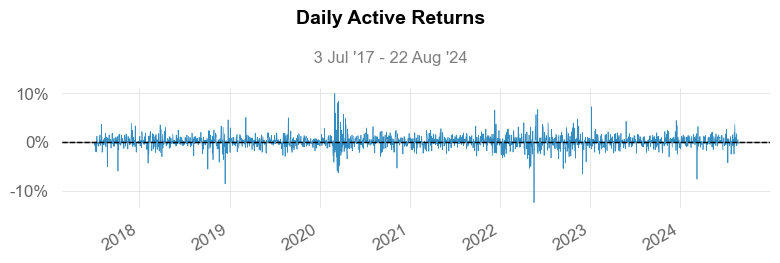

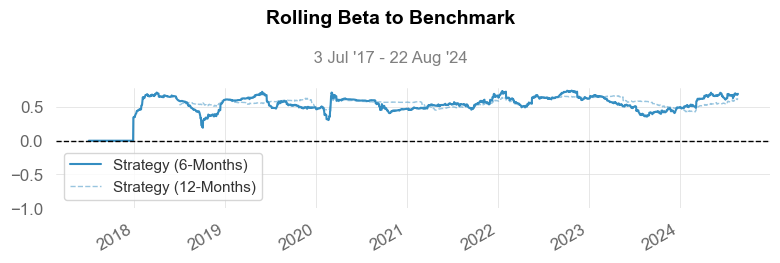

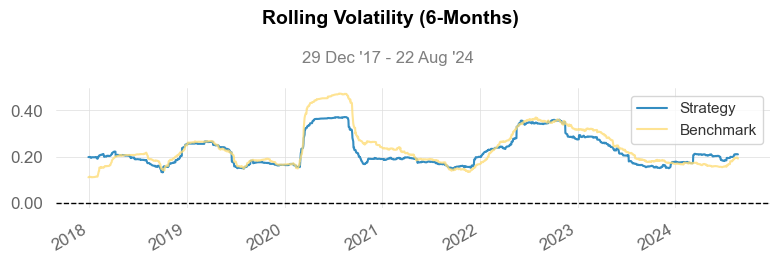

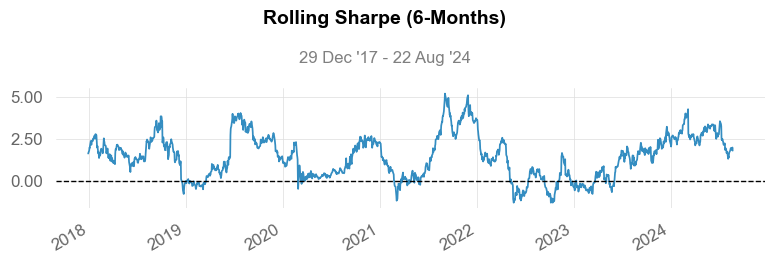

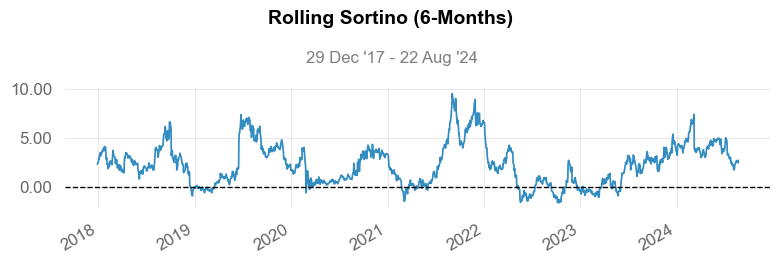

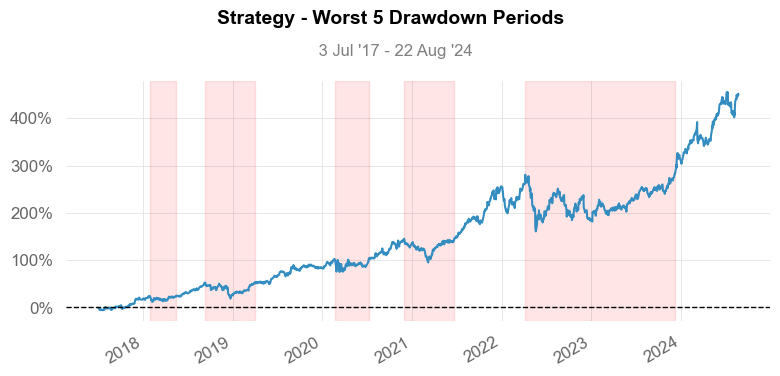

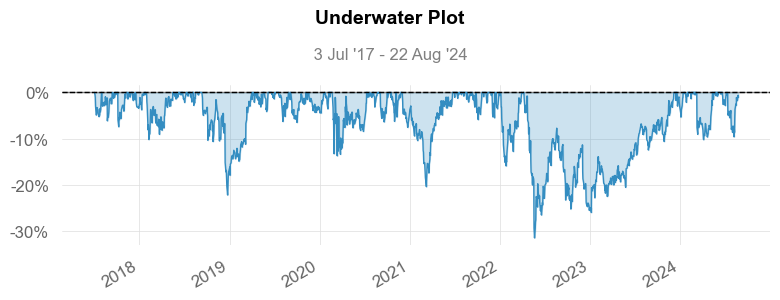

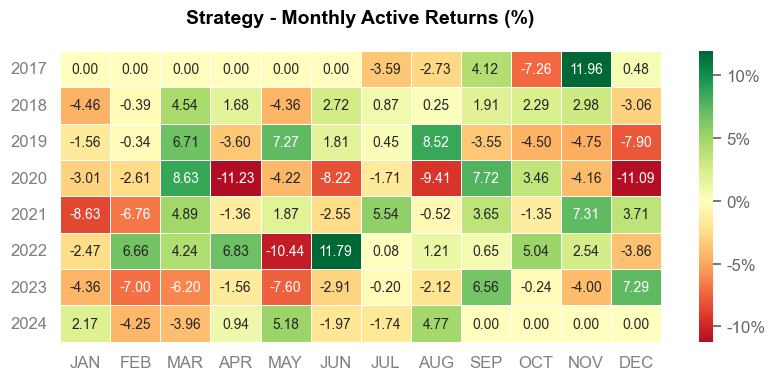

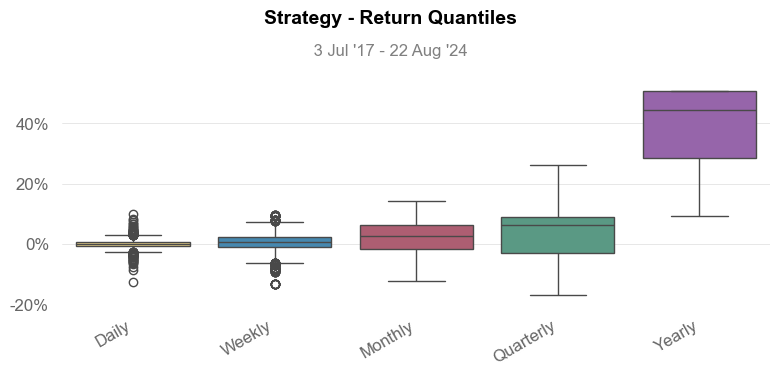

In [29]:
LSTM_portfolio_maxShape = aapl*LSTM_portfolios_weights[0] \
           +tsla*LSTM_portfolios_weights[1] + dis*LSTM_portfolios_weights[2] \
           +lly*LSTM_portfolios_weights[3] + nvda*LSTM_portfolios_weights[4] \
           +msft*LSTM_portfolios_weights[5] + meta*LSTM_portfolios_weights[6] \
           +amzn*LSTM_portfolios_weights[7] + googl*LSTM_portfolios_weights[8] \
           +jpm*LSTM_portfolios_weights[9] + costco*LSTM_portfolios_weights[10] \
           
# LSTM_portfolio_maxShape # Visualizing daily returns
qs.reports.full(LSTM_portfolio_maxShape, benchmark = portfolio)